In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [2]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

TM (generic function with 1 method)

In [3]:
t = 500.0
tt = 250.0
tstep = 0.001
trange = range(0.0, t, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [4]:
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375;
α = 1.15; U0 = 0.3;
xthr = 0.9; ythr = 0.4
ΔU0 = 0.4
I0 = -1.51075;

In [32]:
p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
u0 = [0.5287662926292962, 0.9611190233149197, 0.41838101329795496]

ds = ContinuousDynamicalSystem(TM, u0, p)

3-dimensional continuous dynamical system
 state:       [0.528766, 0.961119, 0.418381]
 rule f:      TM
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.15, 0.013, 0.15, 1.8, 3.07, …, 0.3, 0.4, 0.4375, -1.51075]

In [33]:
I0range = range( -1.51075, -1.51090, length = 5000 )

idx_control_parameter = 11
idx_fix = 2; fixed_value = 0.915
surface = (idx_fix, fixed_value)
setting_root = (xrtol = 1e-11, atol = 1e-11);

In [34]:
length(I0range)

5000

In [35]:
idx_save = 1
output = produce_orbitdiagram(ds, surface, idx_save,
                        idx_control_parameter, I0range;
                        tfinal = t, Ttr = tt,
                        printparams = true,
                        diffeq = integ_set, rootkw = setting_root
                        );

parameter = -1.51075
parameter = -1.5107500300060013
parameter = -1.5107500600120023
parameter = -1.5107500900180035
parameter = -1.5107501200240048
parameter = -1.510750150030006
parameter = -1.5107501800360073
parameter = -1.5107502100420085
parameter = -1.5107502400480095
parameter = -1.5107502700540107
parameter = -1.510750300060012
parameter = -1.5107503300660132
parameter = -1.5107503600720145
parameter = -1.5107503900780157
parameter = -1.5107504200840167
parameter = -1.510750450090018
parameter = -1.5107504800960192
parameter = -1.5107505101020204
parameter = -1.5107505401080217
parameter = -1.5107505701140227
parameter = -1.510750600120024
parameter = -1.5107506301260252
parameter = -1.5107506601320264
parameter = -1.5107506901380277
parameter = -1.510750720144029
parameter = -1.51075075015003
parameter = -1.5107507801560311
parameter = -1.5107508101620324
parameter = -1.5107508401680336
parameter = -1.5107508701740349
parameter = -1.510750900180036
parameter = -1.510750930186

parameter = -1.5107577715543108
parameter = -1.510757801560312
parameter = -1.5107578315663133
parameter = -1.5107578615723145
parameter = -1.5107578915783157
parameter = -1.5107579215843168
parameter = -1.510757951590318
parameter = -1.5107579815963192
parameter = -1.5107580116023205
parameter = -1.5107580416083217
parameter = -1.510758071614323
parameter = -1.510758101620324
parameter = -1.5107581316263252
parameter = -1.5107581616323265
parameter = -1.5107581916383277
parameter = -1.510758221644329
parameter = -1.5107582516503302
parameter = -1.5107582816563312
parameter = -1.5107583116623324
parameter = -1.5107583416683337
parameter = -1.510758371674335
parameter = -1.5107584016803361
parameter = -1.5107584316863372
parameter = -1.5107584616923384
parameter = -1.5107584916983396
parameter = -1.5107585217043409
parameter = -1.5107585517103421
parameter = -1.5107585817163434
parameter = -1.5107586117223444
parameter = -1.5107586417283456
parameter = -1.5107586717343469
parameter = -1

parameter = -1.5107655431086218
parameter = -1.510765573114623
parameter = -1.510765603120624
parameter = -1.5107656331266253
parameter = -1.5107656631326265
parameter = -1.5107656931386277
parameter = -1.510765723144629
parameter = -1.5107657531506302
parameter = -1.5107657831566312
parameter = -1.5107658131626325
parameter = -1.5107658431686337
parameter = -1.510765873174635
parameter = -1.5107659031806362
parameter = -1.5107659331866374
parameter = -1.5107659631926385
parameter = -1.5107659931986397
parameter = -1.510766023204641
parameter = -1.5107660532106422
parameter = -1.5107660832166434
parameter = -1.5107661132226444
parameter = -1.5107661432286457
parameter = -1.510766173234647
parameter = -1.5107662032406481
parameter = -1.5107662332466494
parameter = -1.5107662632526506
parameter = -1.5107662932586516
parameter = -1.5107663232646529
parameter = -1.5107663532706541
parameter = -1.5107663832766554
parameter = -1.5107664132826566
parameter = -1.5107664432886578
parameter = -1

parameter = -1.5107732546509303
parameter = -1.5107732846569313
parameter = -1.5107733146629325
parameter = -1.5107733446689338
parameter = -1.510773374674935
parameter = -1.5107734046809362
parameter = -1.5107734346869375
parameter = -1.5107734646929385
parameter = -1.5107734946989397
parameter = -1.510773524704941
parameter = -1.5107735547109422
parameter = -1.5107735847169435
parameter = -1.5107736147229447
parameter = -1.5107736447289457
parameter = -1.510773674734947
parameter = -1.5107737047409482
parameter = -1.5107737347469494
parameter = -1.5107737647529507
parameter = -1.5107737947589517
parameter = -1.510773824764953
parameter = -1.5107738547709542
parameter = -1.5107738847769554
parameter = -1.5107739147829566
parameter = -1.5107739447889579
parameter = -1.510773974794959
parameter = -1.5107740048009601
parameter = -1.5107740348069614
parameter = -1.5107740648129626
parameter = -1.5107740948189639
parameter = -1.510774124824965
parameter = -1.510774154830966
parameter = -1.

parameter = -1.5107809661932385
parameter = -1.5107809961992398
parameter = -1.510781026205241
parameter = -1.5107810562112423
parameter = -1.5107810862172435
parameter = -1.5107811162232447
parameter = -1.5107811462292458
parameter = -1.510781176235247
parameter = -1.5107812062412482
parameter = -1.5107812362472495
parameter = -1.5107812662532507
parameter = -1.510781296259252
parameter = -1.510781326265253
parameter = -1.5107813562712542
parameter = -1.5107813862772554
parameter = -1.5107814162832567
parameter = -1.510781446289258
parameter = -1.5107814762952592
parameter = -1.5107815063012602
parameter = -1.5107815363072614
parameter = -1.5107815663132627
parameter = -1.510781596319264
parameter = -1.5107816263252651
parameter = -1.5107816563312662
parameter = -1.5107816863372674
parameter = -1.5107817163432686
parameter = -1.5107817463492699
parameter = -1.510781776355271
parameter = -1.5107818063612724
parameter = -1.5107818363672734
parameter = -1.5107818663732746
parameter = -1.

parameter = -1.5107887077415483
parameter = -1.5107887377475495
parameter = -1.5107887677535508
parameter = -1.510788797759552
parameter = -1.510788827765553
parameter = -1.5107888577715542
parameter = -1.5107888877775555
parameter = -1.5107889177835567
parameter = -1.510788947789558
parameter = -1.5107889777955592
parameter = -1.5107890078015602
parameter = -1.5107890378075615
parameter = -1.5107890678135627
parameter = -1.510789097819564
parameter = -1.5107891278255652
parameter = -1.5107891578315664
parameter = -1.5107891878375674
parameter = -1.5107892178435687
parameter = -1.51078924784957
parameter = -1.5107892778555712
parameter = -1.5107893078615724
parameter = -1.5107893378675734
parameter = -1.5107893678735747
parameter = -1.510789397879576
parameter = -1.5107894278855771
parameter = -1.5107894578915784
parameter = -1.5107894878975796
parameter = -1.5107895179035806
parameter = -1.5107895479095819
parameter = -1.510789577915583
parameter = -1.5107896079215843
parameter = -1.5

parameter = -1.5107964792958593
parameter = -1.5107965093018603
parameter = -1.5107965393078615
parameter = -1.5107965693138627
parameter = -1.510796599319864
parameter = -1.5107966293258652
parameter = -1.5107966593318665
parameter = -1.5107966893378675
parameter = -1.5107967193438687
parameter = -1.51079674934987
parameter = -1.5107967793558712
parameter = -1.5107968093618724
parameter = -1.5107968393678737
parameter = -1.5107968693738747
parameter = -1.510796899379876
parameter = -1.5107969293858772
parameter = -1.5107969593918784
parameter = -1.5107969893978797
parameter = -1.5107970194038807
parameter = -1.510797049409882
parameter = -1.5107970794158831
parameter = -1.5107971094218844
parameter = -1.5107971394278856
parameter = -1.5107971694338869
parameter = -1.5107971994398879
parameter = -1.5107972294458891
parameter = -1.5107972594518904
parameter = -1.5107972894578916
parameter = -1.5107973194638928
parameter = -1.510797349469894
parameter = -1.510797379475895
parameter = -1.

parameter = -1.5108042208441688
parameter = -1.51080425085017
parameter = -1.5108042808561712
parameter = -1.5108043108621725
parameter = -1.5108043408681737
parameter = -1.5108043708741747
parameter = -1.510804400880176
parameter = -1.5108044308861772
parameter = -1.5108044608921785
parameter = -1.5108044908981797
parameter = -1.510804520904181
parameter = -1.510804550910182
parameter = -1.5108045809161832
parameter = -1.5108046109221844
parameter = -1.5108046409281857
parameter = -1.510804670934187
parameter = -1.510804700940188
parameter = -1.5108047309461892
parameter = -1.5108047609521904
parameter = -1.5108047909581916
parameter = -1.5108048209641929
parameter = -1.5108048509701941
parameter = -1.5108048809761951
parameter = -1.5108049109821964
parameter = -1.5108049409881976
parameter = -1.5108049709941989
parameter = -1.5108050010002
parameter = -1.5108050310062013
parameter = -1.5108050610122024
parameter = -1.5108050910182036
parameter = -1.5108051210242048
parameter = -1.510

parameter = -1.5108119923984797
parameter = -1.510812022404481
parameter = -1.510812052410482
parameter = -1.5108120824164832
parameter = -1.5108121124224845
parameter = -1.5108121424284857
parameter = -1.510812172434487
parameter = -1.5108122024404882
parameter = -1.5108122324464892
parameter = -1.5108122624524905
parameter = -1.5108122924584917
parameter = -1.510812322464493
parameter = -1.5108123524704942
parameter = -1.5108123824764954
parameter = -1.5108124124824964
parameter = -1.5108124424884977
parameter = -1.510812472494499
parameter = -1.5108125025005001
parameter = -1.5108125325065014
parameter = -1.5108125625125024
parameter = -1.5108125925185036
parameter = -1.5108126225245049
parameter = -1.5108126525305061
parameter = -1.5108126825365074
parameter = -1.5108127125425086
parameter = -1.5108127425485096
parameter = -1.5108127725545109
parameter = -1.510812802560512
parameter = -1.5108128325665133
parameter = -1.5108128625725146
parameter = -1.5108128925785158
parameter = -1

parameter = -1.5108197339467893
parameter = -1.5108197639527905
parameter = -1.5108197939587917
parameter = -1.510819823964793
parameter = -1.5108198539707942
parameter = -1.5108198839767955
parameter = -1.5108199139827965
parameter = -1.5108199439887977
parameter = -1.510819973994799
parameter = -1.5108200040008002
parameter = -1.5108200340068014
parameter = -1.5108200640128027
parameter = -1.5108200940188037
parameter = -1.510820124024805
parameter = -1.5108201540308062
parameter = -1.5108201840368074
parameter = -1.5108202140428086
parameter = -1.5108202440488097
parameter = -1.510820274054811
parameter = -1.5108203040608121
parameter = -1.5108203340668134
parameter = -1.5108203640728146
parameter = -1.5108203940788159
parameter = -1.5108204240848169
parameter = -1.510820454090818
parameter = -1.5108204840968193
parameter = -1.5108205141028206
parameter = -1.5108205441088218
parameter = -1.510820574114823
parameter = -1.510820604120824
parameter = -1.5108206341268253
parameter = -1.

parameter = -1.5108274454890978
parameter = -1.510827475495099
parameter = -1.5108275055011002
parameter = -1.5108275355071015
parameter = -1.5108275655131027
parameter = -1.5108275955191037
parameter = -1.510827625525105
parameter = -1.5108276555311062
parameter = -1.5108276855371074
parameter = -1.5108277155431087
parameter = -1.51082774554911
parameter = -1.510827775555111
parameter = -1.5108278055611122
parameter = -1.5108278355671134
parameter = -1.5108278655731147
parameter = -1.510827895579116
parameter = -1.510827925585117
parameter = -1.5108279555911182
parameter = -1.5108279855971194
parameter = -1.5108280156031206
parameter = -1.5108280456091219
parameter = -1.5108280756151231
parameter = -1.5108281056211241
parameter = -1.5108281356271254
parameter = -1.5108281656331266
parameter = -1.5108281956391278
parameter = -1.510828225645129
parameter = -1.5108282556511303
parameter = -1.5108282856571313
parameter = -1.5108283156631326
parameter = -1.5108283456691338
parameter = -1.5

parameter = -1.5108351570314063
parameter = -1.5108351870374075
parameter = -1.5108352170434087
parameter = -1.51083524704941
parameter = -1.510835277055411
parameter = -1.5108353070614122
parameter = -1.5108353370674135
parameter = -1.5108353670734147
parameter = -1.510835397079416
parameter = -1.5108354270854172
parameter = -1.5108354570914182
parameter = -1.5108354870974194
parameter = -1.5108355171034207
parameter = -1.510835547109422
parameter = -1.5108355771154232
parameter = -1.5108356071214244
parameter = -1.5108356371274254
parameter = -1.5108356671334267
parameter = -1.510835697139428
parameter = -1.5108357271454291
parameter = -1.5108357571514304
parameter = -1.5108357871574314
parameter = -1.5108358171634326
parameter = -1.5108358471694339
parameter = -1.510835877175435
parameter = -1.5108359071814363
parameter = -1.5108359371874376
parameter = -1.5108359671934386
parameter = -1.5108359971994398
parameter = -1.510836027205441
parameter = -1.5108360572114423
parameter = -1.5

parameter = -1.510842898579716
parameter = -1.5108429285857172
parameter = -1.5108429585917182
parameter = -1.5108429885977195
parameter = -1.5108430186037207
parameter = -1.510843048609722
parameter = -1.5108430786157232
parameter = -1.5108431086217244
parameter = -1.5108431386277255
parameter = -1.5108431686337267
parameter = -1.510843198639728
parameter = -1.5108432286457292
parameter = -1.5108432586517304
parameter = -1.5108432886577317
parameter = -1.5108433186637327
parameter = -1.510843348669734
parameter = -1.5108433786757351
parameter = -1.5108434086817364
parameter = -1.5108434386877376
parameter = -1.5108434686937386
parameter = -1.5108434986997399
parameter = -1.5108435287057411
parameter = -1.5108435587117424
parameter = -1.5108435887177436
parameter = -1.5108436187237448
parameter = -1.5108436487297459
parameter = -1.510843678735747
parameter = -1.5108437087417483
parameter = -1.5108437387477496
parameter = -1.5108437687537508
parameter = -1.510843798759752
parameter = -1

parameter = -1.5108506701340267
parameter = -1.510850700140028
parameter = -1.5108507301460292
parameter = -1.5108507601520305
parameter = -1.5108507901580317
parameter = -1.5108508201640327
parameter = -1.510850850170034
parameter = -1.5108508801760352
parameter = -1.5108509101820364
parameter = -1.5108509401880377
parameter = -1.510850970194039
parameter = -1.51085100020004
parameter = -1.5108510302060412
parameter = -1.5108510602120424
parameter = -1.5108510902180436
parameter = -1.5108511202240449
parameter = -1.510851150230046
parameter = -1.5108511802360471
parameter = -1.5108512102420484
parameter = -1.5108512402480496
parameter = -1.5108512702540509
parameter = -1.510851300260052
parameter = -1.5108513302660531
parameter = -1.5108513602720544
parameter = -1.5108513902780556
parameter = -1.5108514202840568
parameter = -1.510851450290058
parameter = -1.5108514802960593
parameter = -1.5108515103020603
parameter = -1.5108515403080616
parameter = -1.5108515703140628
parameter = -1.5

parameter = -1.5108584416883377
parameter = -1.510858471694339
parameter = -1.51085850170034
parameter = -1.5108585317063412
parameter = -1.5108585617123425
parameter = -1.5108585917183437
parameter = -1.510858621724345
parameter = -1.5108586517303462
parameter = -1.5108586817363472
parameter = -1.5108587117423484
parameter = -1.5108587417483497
parameter = -1.510858771754351
parameter = -1.5108588017603521
parameter = -1.5108588317663532
parameter = -1.5108588617723544
parameter = -1.5108588917783556
parameter = -1.5108589217843569
parameter = -1.5108589517903581
parameter = -1.5108589817963594
parameter = -1.5108590118023604
parameter = -1.5108590418083616
parameter = -1.5108590718143629
parameter = -1.510859101820364
parameter = -1.5108591318263653
parameter = -1.5108591618323666
parameter = -1.5108591918383676
parameter = -1.5108592218443688
parameter = -1.51085925185037
parameter = -1.5108592818563713
parameter = -1.5108593118623725
parameter = -1.5108593418683738
parameter = -1.5

parameter = -1.5108661832366472
parameter = -1.5108662132426485
parameter = -1.5108662432486497
parameter = -1.510866273254651
parameter = -1.5108663032606522
parameter = -1.5108663332666534
parameter = -1.5108663632726544
parameter = -1.5108663932786557
parameter = -1.510866423284657
parameter = -1.5108664532906582
parameter = -1.5108664832966594
parameter = -1.5108665133026606
parameter = -1.5108665433086617
parameter = -1.510866573314663
parameter = -1.5108666033206641
parameter = -1.5108666333266654
parameter = -1.5108666633326666
parameter = -1.5108666933386676
parameter = -1.5108667233446689
parameter = -1.51086675335067
parameter = -1.5108667833566714
parameter = -1.5108668133626726
parameter = -1.5108668433686738
parameter = -1.5108668733746748
parameter = -1.510866903380676
parameter = -1.5108669333866773
parameter = -1.5108669633926786
parameter = -1.5108669933986798
parameter = -1.510867023404681
parameter = -1.510867053410682
parameter = -1.5108670834166833
parameter = -1.5

parameter = -1.510873924784957
parameter = -1.5108739547909582
parameter = -1.5108739847969594
parameter = -1.5108740148029607
parameter = -1.5108740448089617
parameter = -1.510874074814963
parameter = -1.5108741048209642
parameter = -1.5108741348269654
parameter = -1.5108741648329667
parameter = -1.510874194838968
parameter = -1.510874224844969
parameter = -1.5108742548509702
parameter = -1.5108742848569714
parameter = -1.5108743148629726
parameter = -1.5108743448689739
parameter = -1.510874374874975
parameter = -1.5108744048809761
parameter = -1.5108744348869774
parameter = -1.5108744648929786
parameter = -1.5108744948989798
parameter = -1.510874524904981
parameter = -1.510874554910982
parameter = -1.5108745849169833
parameter = -1.5108746149229846
parameter = -1.5108746449289858
parameter = -1.510874674934987
parameter = -1.5108747049409883
parameter = -1.5108747349469893
parameter = -1.5108747649529906
parameter = -1.5108747949589918
parameter = -1.510874824964993
parameter = -1.51

parameter = -1.5108816663332667
parameter = -1.510881696339268
parameter = -1.510881726345269
parameter = -1.5108817563512702
parameter = -1.5108817863572714
parameter = -1.5108818163632727
parameter = -1.510881846369274
parameter = -1.5108818763752752
parameter = -1.5108819063812762
parameter = -1.5108819363872774
parameter = -1.5108819663932787
parameter = -1.51088199639928
parameter = -1.5108820264052811
parameter = -1.5108820564112821
parameter = -1.5108820864172834
parameter = -1.5108821164232846
parameter = -1.5108821464292859
parameter = -1.510882176435287
parameter = -1.5108822064412883
parameter = -1.5108822364472894
parameter = -1.5108822664532906
parameter = -1.5108822964592918
parameter = -1.510882326465293
parameter = -1.5108823564712943
parameter = -1.5108823864772956
parameter = -1.5108824164832966
parameter = -1.5108824464892978
parameter = -1.510882476495299
parameter = -1.5108825065013003
parameter = -1.5108825365073015
parameter = -1.5108825665133025
parameter = -1.5

parameter = -1.5108894078815762
parameter = -1.5108894378875775
parameter = -1.5108894678935787
parameter = -1.51088949789958
parameter = -1.5108895279055812
parameter = -1.5108895579115824
parameter = -1.5108895879175834
parameter = -1.5108896179235847
parameter = -1.510889647929586
parameter = -1.5108896779355871
parameter = -1.5108897079415884
parameter = -1.5108897379475896
parameter = -1.5108897679535906
parameter = -1.5108897979595919
parameter = -1.5108898279655931
parameter = -1.5108898579715944
parameter = -1.5108898879775956
parameter = -1.5108899179835966
parameter = -1.5108899479895979
parameter = -1.510889977995599
parameter = -1.5108900080016003
parameter = -1.5108900380076016
parameter = -1.5108900680136028
parameter = -1.5108900980196038
parameter = -1.510890128025605
parameter = -1.5108901580316063
parameter = -1.5108901880376076
parameter = -1.5108902180436088
parameter = -1.51089024804961
parameter = -1.510890278055611
parameter = -1.5108903080616123
parameter = -1.5

parameter = -1.5108971794358872
parameter = -1.5108972094418884
parameter = -1.5108972394478897
parameter = -1.5108972694538907
parameter = -1.510897299459892
parameter = -1.5108973294658932
parameter = -1.5108973594718944
parameter = -1.5108973894778956
parameter = -1.5108974194838969
parameter = -1.510897449489898
parameter = -1.5108974794958991
parameter = -1.5108975095019004
parameter = -1.5108975395079016
parameter = -1.5108975695139029
parameter = -1.5108975995199039
parameter = -1.5108976295259051
parameter = -1.5108976595319064
parameter = -1.5108976895379076
parameter = -1.5108977195439088
parameter = -1.51089774954991
parameter = -1.510897779555911
parameter = -1.5108978095619123
parameter = -1.5108978395679136
parameter = -1.5108978695739148
parameter = -1.510897899579916
parameter = -1.5108979295859173
parameter = -1.5108979595919183
parameter = -1.5108979895979195
parameter = -1.5108980196039208
parameter = -1.510898049609922
parameter = -1.5108980796159233
parameter = -1.

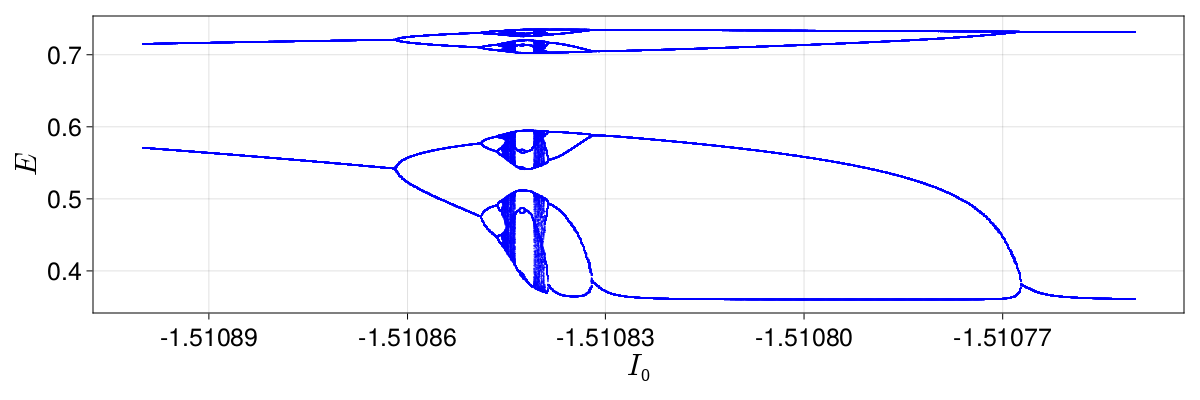

In [43]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1,1]; xlabel = L"I_0", ylabel = L"E", xlabelsize = 30, ylabelsize = 30,
            xticklabelsize = 25, yticklabelsize = 25)
for (j, p) in enumerate(I0range)
    scatter!(axis, fill(p, length(output[j])), output[j]; color = ("blue", 0.5), markersize = 1.5)
end
f

In [39]:
save("E_left_space_5000_dots.jld", "data", output)